Part -1


Load and Plot Data

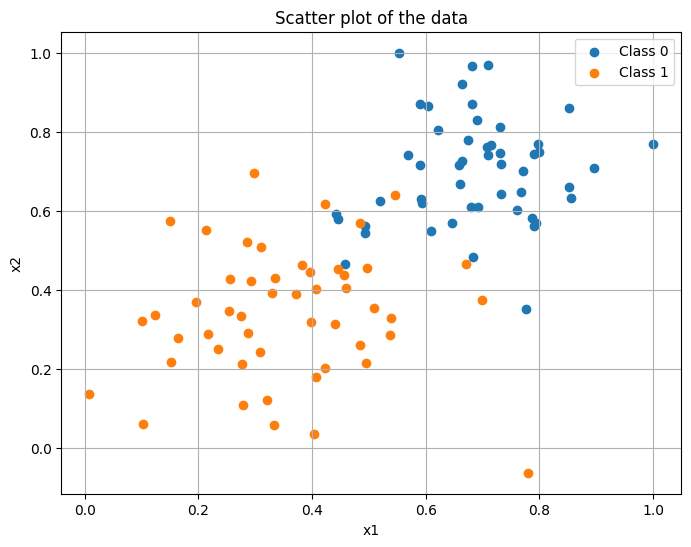

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Shared config
DATA_PATH = Path("/Users/tbz/580_Class/untitled folder/data.csv")
PALETTE = {0: "#1f77b4", 1: "#ff7f0e"}

# Utilities

def load_data(path: Path = DATA_PATH) -> pd.DataFrame:
    df = pd.read_csv(path, header=None)
    df.columns = ["x1", "x2", "label"]
    return df


def make_features(df: pd.DataFrame):
    X = df[["x1", "x2"]].values
    y = df["label"].values.astype(int)
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X, y, X_bias


def plot_scatter(df: pd.DataFrame, palette: dict = PALETTE):
    plt.figure(figsize=(8, 6))
    for label in sorted(df["label"].unique()):
        subset = df[df["label"] == label]
        color = palette.get(int(label), "gray")
        plt.scatter(subset["x1"], subset["x2"], label=f"Class {label}", color=color)
    plt.title("Scatter plot of the data")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_boundaries(X_bias: np.ndarray, y: np.ndarray, boundaries: list, title: str = "Decision Boundaries", palette: dict = PALETTE):
    plt.figure(figsize=(8, 6))

    # Scatter
    for label in np.unique(y):
        color = palette.get(int(label), "gray")
        plt.scatter(X_bias[y == label, 1], X_bias[y == label, 2], label=f"Class {label}", color=color)

    # Line x-range from data
    x_min, x_max = X_bias[:, 1].min(), X_bias[:, 1].max()
    padding = 0.05 * (x_max - x_min if x_max > x_min else 1.0)
    x_vals = np.linspace(x_min - padding, x_max + padding, 100)

    # Plot boundaries
    for i, w in enumerate(boundaries):
        y_vals = -(w[0] + w[1] * x_vals) / (w[2] + 1e-12)
        if i == 0:
            plt.plot(x_vals, y_vals, "r-", label="Initial boundary", linewidth=2)
        elif i == len(boundaries) - 1:
            plt.plot(x_vals, y_vals, "k-", label="Final boundary", linewidth=2)
        else:
            plt.plot(x_vals, y_vals, "g--", alpha=0.25)

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_losses(losses: list, title: str = "Log Loss over Epochs"):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(losses) + 1), losses, marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.grid(True)
    plt.show()

# Load once and make features
df = load_data()
X, y, X_bias = make_features(df)

# Initial visualization
plot_scatter(df)

Implement Perceptron (Heuristic Rule)

In [13]:
def perceptron_mistake_update(X_bias: np.ndarray, y: np.ndarray, learning_rate: float = 0.1, num_epochs: int = 20, random_seed: int = 42):
    """Mistake-driven perceptron training.

    Parameters
    ----------
    X_bias : array (n_samples, 3)
        Features with bias term in column 0.
    y : array (n_samples,)
        Binary labels in {0, 1}.
    learning_rate : float
        Per-update step size.
    num_epochs : int
        Number of passes over the data.
    random_seed : int
        Seed for deterministic initialization.

    Returns
    -------
    boundaries : list[np.ndarray]
        Sequence of weight vectors captured after each update (includes initial and final).
    update_count : int
        Total number of updates performed.
    """
    rng = np.random.default_rng(random_seed)
    weights = rng.normal(size=X_bias.shape[1])
    boundaries = [weights.copy()]
    update_count = 0

    for _ in range(num_epochs):
        for i in range(X_bias.shape[0]):
            activation = X_bias[i] @ weights
            pred = 1 if activation >= 0 else 0
            if pred != y[i]:
                weights += learning_rate * (y[i] - pred) * X_bias[i]
                update_count += 1
                boundaries.append(weights.copy())

    return boundaries, update_count

boundaries, update_count = perceptron_mistake_update(X_bias, y, learning_rate=0.1, num_epochs=20, random_seed=0)
print("Number of updates:", update_count)
print("Initial weights:", boundaries[0])
print("Final weights:", boundaries[-1])

Number of updates: 59
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 0.22573022 -0.27060086 -0.50498825]


Plot the initial separation

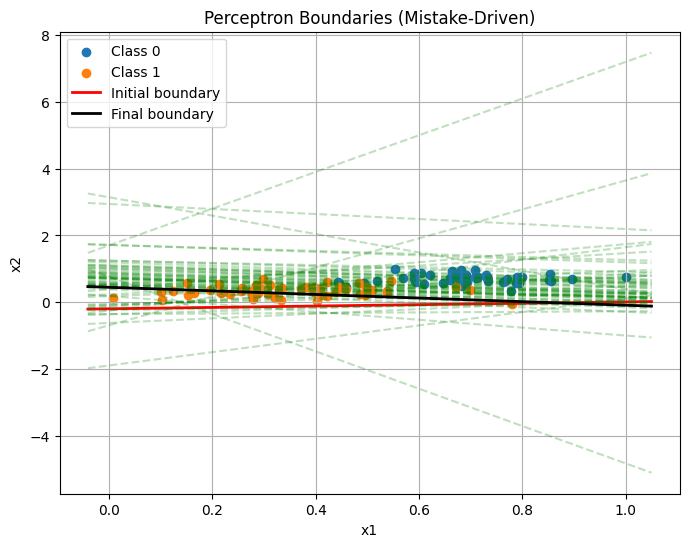

In [14]:
# Reuse unified boundary plotting
plot_boundaries(X_bias, y, boundaries, title="Perceptron Boundaries (Mistake-Driven)")

Learning Rates



Training with learning_rate = 0.01, epochs = 10
Number of updates: 204
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 0.08573022 -0.30801937  0.07093661]


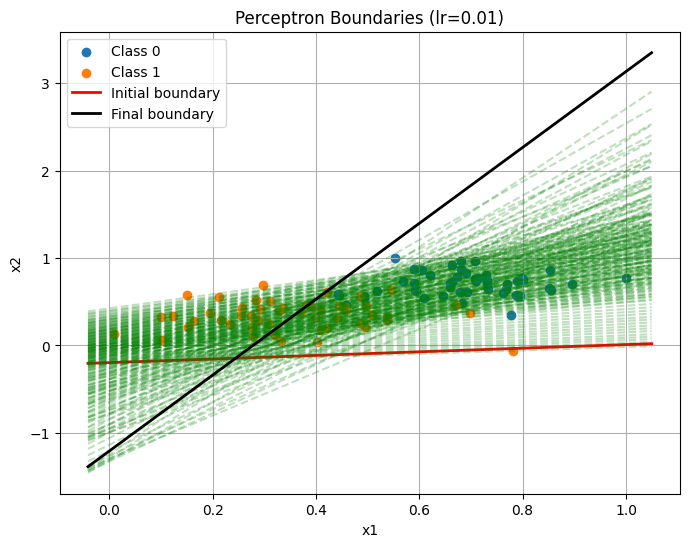


Training with learning_rate = 0.1, epochs = 10
Number of updates: 30
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 0.12573022 -0.16883986 -0.28270635]


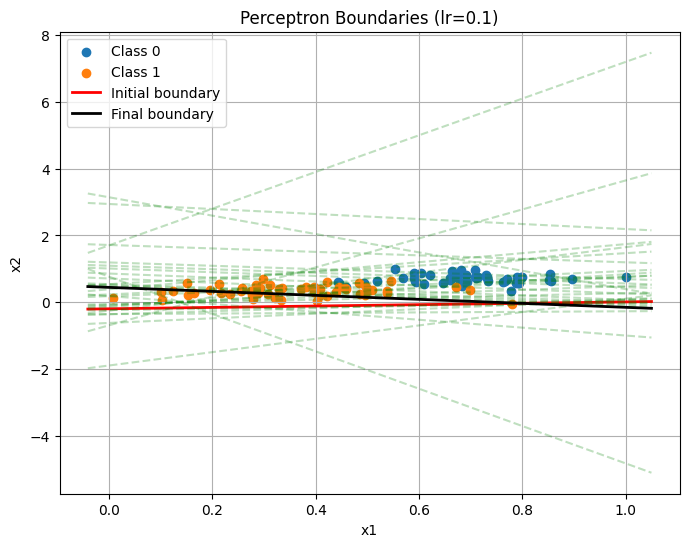


Training with learning_rate = 1.0, epochs = 10
Number of updates: 32
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 2.12573022 -1.05648486 -4.68550235]


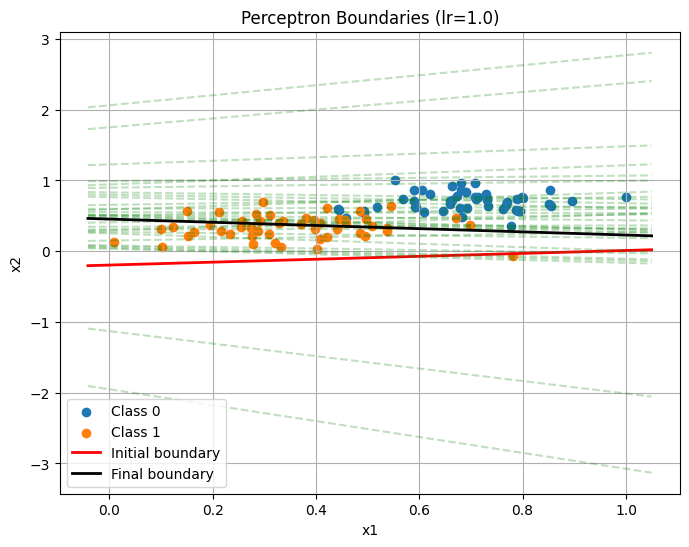

In [15]:
learning_rates = [0.01, 0.1, 1.0]
num_epochs = 10

for lr in learning_rates:
    print(f"\nTraining with learning_rate = {lr}, epochs = {num_epochs}")
    boundaries, update_count = perceptron_mistake_update(X_bias, y, learning_rate=lr, num_epochs=num_epochs, random_seed=0)
    print("Number of updates:", update_count)
    print("Initial weights:", boundaries[0])
    print("Final weights:", boundaries[-1])

    plot_boundaries(X_bias, y, boundaries, title=f"Perceptron Boundaries (lr={lr})")

Part- 2

Plot the data

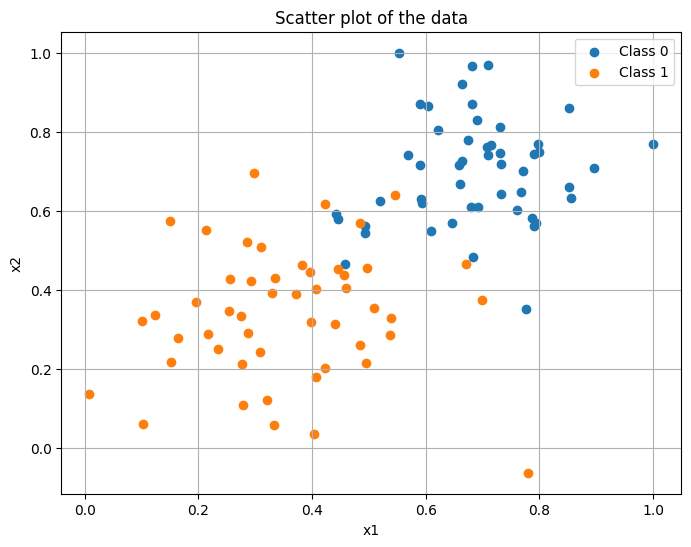

In [16]:
# Reuse loaded data and plotting utilities
plot_scatter(df)

Implement perceptron using the Gradient
Descent

In [ ]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))


def logistic_regression_train(
    X_bias: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.1,
    num_epochs: int = 100,
    random_seed: int = 42,
    record_every: int = 1,
):
    rng = np.random.default_rng(random_seed)
    weights = rng.normal(size=X_bias.shape[1])
    boundaries = [weights.copy()]
    losses = []

    for epoch in range(num_epochs):
        y_hat = sigmoid(X_bias @ weights)
        error = y_hat - y
        loss = -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))
        losses.append(loss)

        grad = (X_bias.T @ error) / len(y)
        weights -= learning_rate * grad

        if (epoch + 1) % record_every == 0:
            boundaries.append(weights.copy())

    return weights, boundaries, losses

final_weights, boundaries, losses = logistic_regression_train(
    X_bias, y, learning_rate=0.1, num_epochs=100, random_seed=0, record_every=1
)

rounded_weights = [round(float(w), 2) for w in final_weights]
rounded_losses = [round(float(l), 3) for l in losses[:5]]

print("Final weight vector (after 100 epochs):")
print(rounded_weights)
print("\nFirst 5 log loss values (training progress):")
print(rounded_losses)

Final weight vector (after 10 epochs):
[np.float64(10.12), np.float64(-9.39), np.float64(-9.92)]

First 5 log loss values (training progress):
[np.float64(0.703), np.float64(0.664), np.float64(0.889), np.float64(1.65), np.float64(0.996)]


Plot the initial separation line

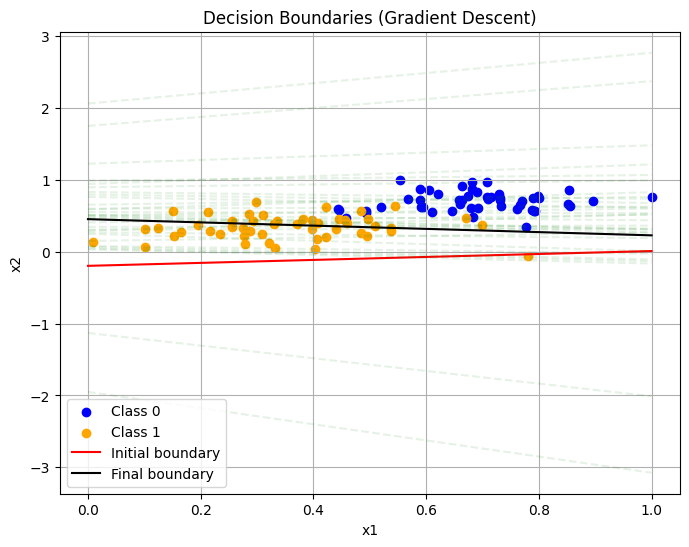

In [17]:
def plot_boundaries(X, y, boundaries, title="Decision Boundaries"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0][:,1], X[y==0][:,2], c='blue', label='Class 0')
    plt.scatter(X[y==1][:,1], X[y==1][:,2], c='orange', label='Class 1')

    x_vals = np.array([0, 1])
    for i, w in enumerate(boundaries):
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        if i == 0:
            plt.plot(x_vals, y_vals, 'r-', label='Initial boundary')
        elif i == len(boundaries) - 1:
            plt.plot(x_vals, y_vals, 'k-', label='Final boundary')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.1)

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_boundaries(X_bias, y, boundaries, title="Decision Boundaries (Gradient Descent)")

Compute log loss (error)

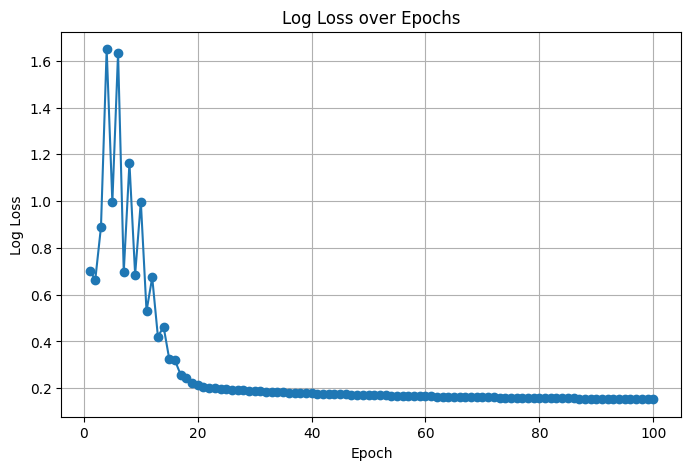

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.title('Log Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

Learning rate


Training with learning_rate = 0.01, total_epochs = 100
Final weight vector (after training):
[np.float64(1.52), np.float64(-0.9), np.float64(-1.5)]
Log loss values every 10 epochs:
[np.float64(0.552), np.float64(0.548), np.float64(0.544), np.float64(0.54), np.float64(0.537), np.float64(0.534), np.float64(0.531), np.float64(0.529), np.float64(0.526), np.float64(0.524)]


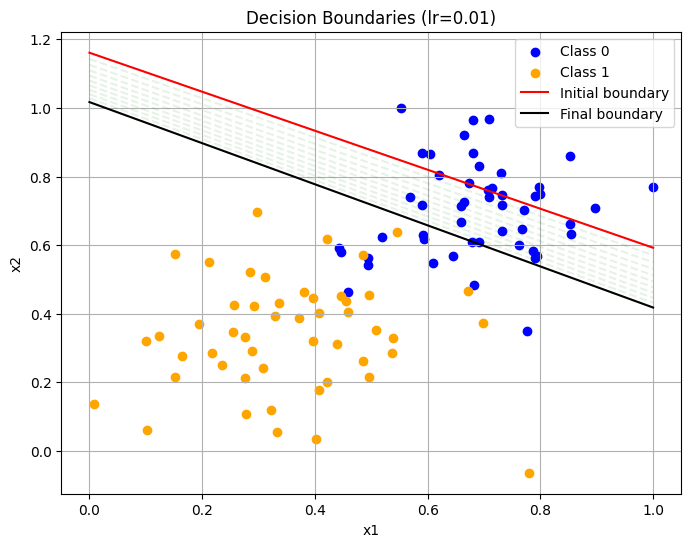

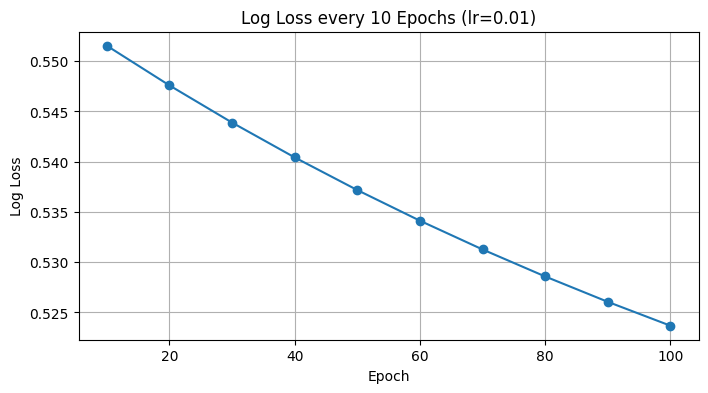


Training with learning_rate = 0.1, total_epochs = 100
Final weight vector (after training):
[np.float64(1.34), np.float64(-0.31), np.float64(-2.61)]
Log loss values every 10 epochs:
[np.float64(0.537), np.float64(0.529), np.float64(0.522), np.float64(0.517), np.float64(0.512), np.float64(0.507), np.float64(0.502), np.float64(0.497), np.float64(0.493), np.float64(0.489)]


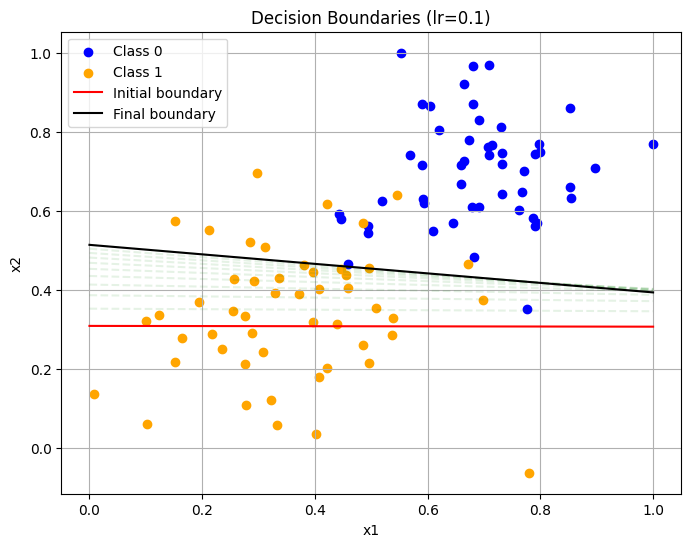

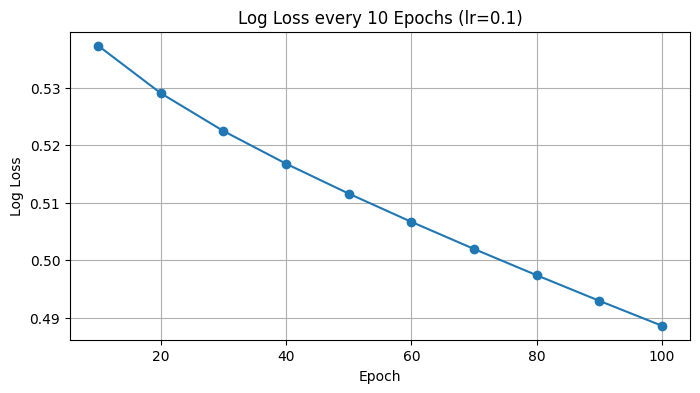


Training with learning_rate = 1.0, total_epochs = 100
Final weight vector (after training):
[np.float64(3.39), np.float64(-3.49), np.float64(-3.23)]
Log loss values every 10 epochs:
[np.float64(0.612), np.float64(0.546), np.float64(0.495), np.float64(0.454), np.float64(0.421), np.float64(0.394), np.float64(0.371), np.float64(0.352), np.float64(0.336), np.float64(0.322)]


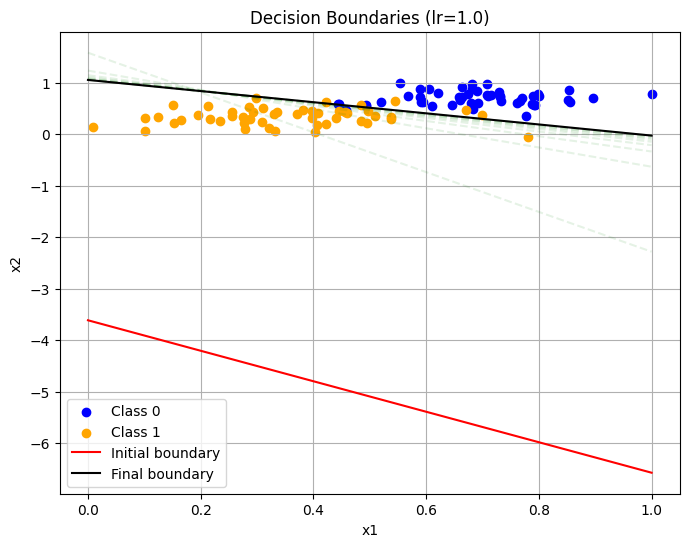

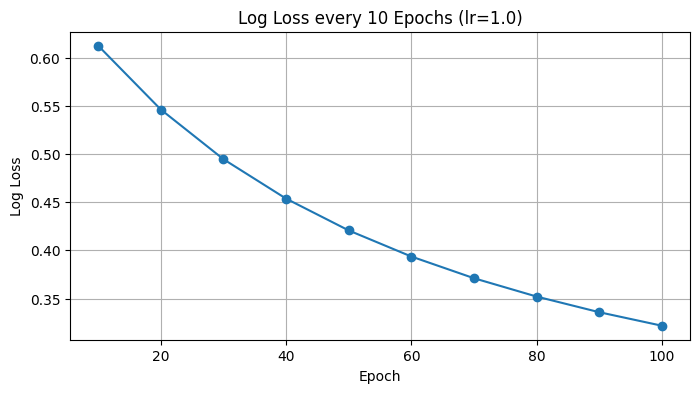

In [19]:
def run_perceptron_every_10_epochs(lr=0.1, total_epochs=100):
    print(f"\nTraining with learning_rate = {lr}, total_epochs = {total_epochs}")

    boundaries = []
    losses_every_10 = []

    w = np.random.randn(X_bias.shape[1])
    boundaries.append(w.copy())

    for epoch in range(1, total_epochs + 1):
        y_pred = 1 / (1 + np.exp(-X_bias @ w))
        error = y - y_pred
        gradient = -X_bias.T @ error / len(y)
        w -= lr * gradient
        boundaries.append(w.copy())


        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

        # Save every 10 epochs
        if epoch % 10 == 0:
            losses_every_10.append(loss)

    final_weights = boundaries[-1]
    rounded_weights = [round(wi, 2) for wi in final_weights]

    print("Final weight vector (after training):")
    print(rounded_weights)
    print("Log loss values every 10 epochs:")
    print([round(l, 3) for l in losses_every_10])

    # Plot decision boundaries
    plot_boundaries(X_bias, y, boundaries[::10] + [boundaries[-1]], title=f"Decision Boundaries (lr={lr})")

    # Plot loss curve every 10 epochs
    plt.figure(figsize=(8, 4))
    plt.plot(range(10, total_epochs + 1, 10), losses_every_10, marker='o')
    plt.title(f"Log Loss every 10 Epochs (lr={lr})")
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.grid(True)
    plt.show()

run_perceptron_every_10_epochs(lr=0.01, total_epochs=100)
run_perceptron_every_10_epochs(lr=0.1, total_epochs=100)
run_perceptron_every_10_epochs(lr=1.0, total_epochs=100)